In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
automobile_data_processed = pd.read_csv('datasets/automobile_data_processed.csv')
automobile_data_processed.sample(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
88,1,154.0,plymouth,gas,std,four,sedan,fwd,front,93.7,...,98,2bbl,2.97,3.23,9.4,68.0,5500.0,31,38,7609.0
84,1,119.0,plymouth,gas,std,two,hatchback,fwd,front,93.7,...,90,2bbl,2.97,3.23,9.4,68.0,5500.0,37,41,5572.0
24,0,110.0,honda,gas,std,four,sedan,fwd,front,96.5,...,92,1bbl,2.91,3.41,9.2,76.0,6000.0,30,34,7295.0
136,-1,65.0,toyota,gas,std,four,hatchback,fwd,front,102.4,...,122,mpfi,3.31,3.54,8.7,92.0,4200.0,27,32,11248.0
141,2,122.0,volkswagen,gas,std,two,sedan,fwd,front,97.3,...,109,mpfi,3.19,3.40,9.0,85.0,5250.0,27,34,7975.0


<Figure size 1080x720 with 0 Axes>

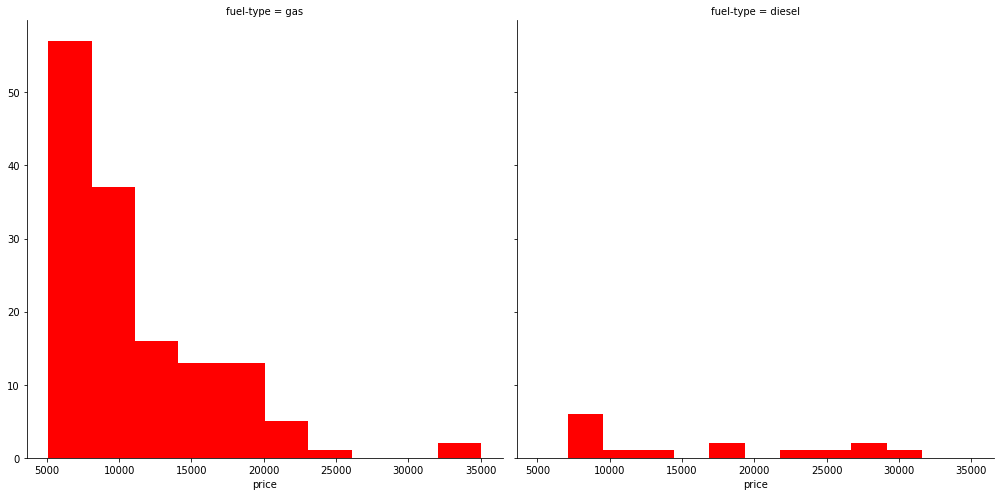

In [3]:
#facegrid -> a way to understand the different facets of the same relationship
plt.figure(figsize = (15, 10))
#instantiate a FacetGrid object and our columns will be based on the fuel-type
fg = sns.FacetGrid(automobile_data_processed,
                  col = 'fuel-type',
                  height = 7, aspect = 1)
#we'll start off by visualizing univariate data
fg.map(plt.hist, 'price', color = 'red')
plt.show()

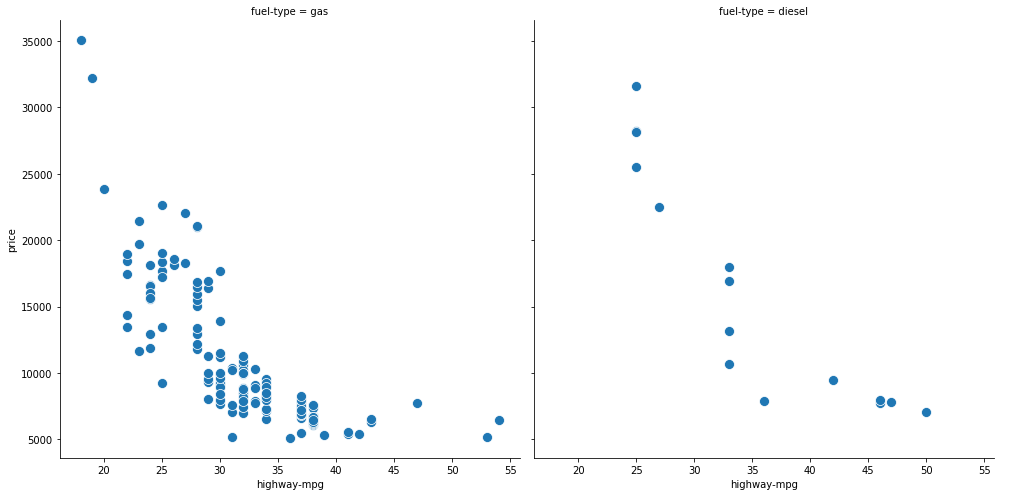

In [4]:
#let's use a facet grid this time to visualize a bivariate relationship
fg = sns.FacetGrid(automobile_data_processed,
                  col = 'fuel-type',
                  height = 7, aspect = 1)
#we'll use a scatterplot to see how the mileage of a car varies based on price
#both are negative relationships
fg.map(sns.scatterplot, 'highway-mpg', 'price', s = 100)
fg.add_legend()

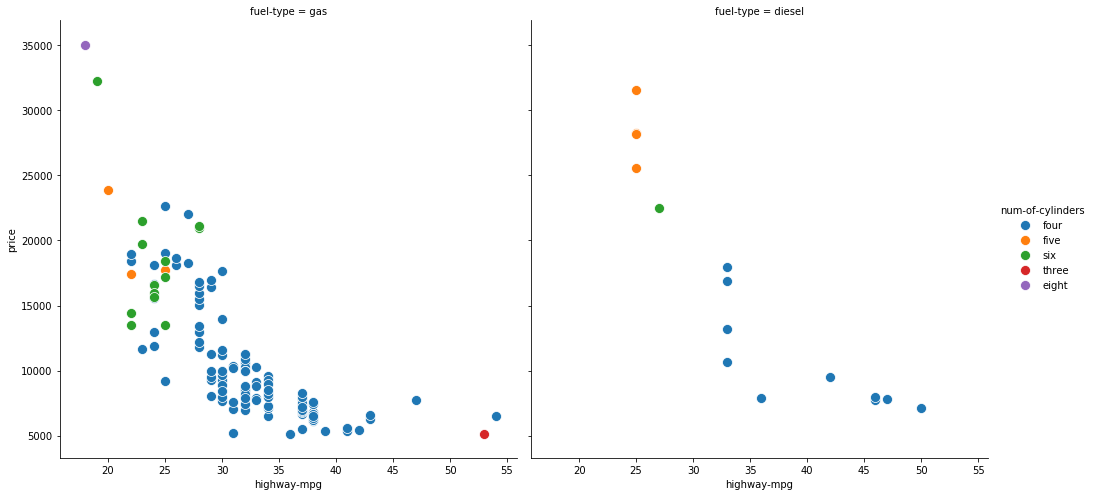

In [6]:
fg = sns.FacetGrid(automobile_data_processed,
                  col = 'fuel-type',
                  hue = 'num-of-cylinders', #we'll also use the hue of our scatter plot
                  height = 7, aspect = 1)

fg.map(sns.scatterplot, 'highway-mpg', 'price', s = 100)
fg.add_legend()

In [7]:
#let's see how we can use the FaceGrid with a different set of data
tips_data = pd.read_csv('datasets/tips.csv')
tips_data.sample(10)

,total_bill,tip,sex,smoker,day,time,size
119,24.08,2.92,Female,No,Thur,Lunch,4
225,16.27,2.50,Female,Yes,Fri,Lunch,2
98,21.01,3.00,Male,Yes,Fri,Dinner,2
42,13.94,3.06,Male,No,Sun,Dinner,2
28,21.70,4.30,Male,No,Sat,Dinner,2
37,16.93,3.07,Female,No,Sat,Dinner,3
87,18.28,4.00,Male,No,Thur,Lunch,2
134,18.26,3.25,Female,No,Thur,Lunch,2
62,11.02,1.98,Male,Yes,Sat,Dinner,2
41,17.46,2.54,Male,No,Sun,Dinner,2


<Figure size 1080x720 with 0 Axes>

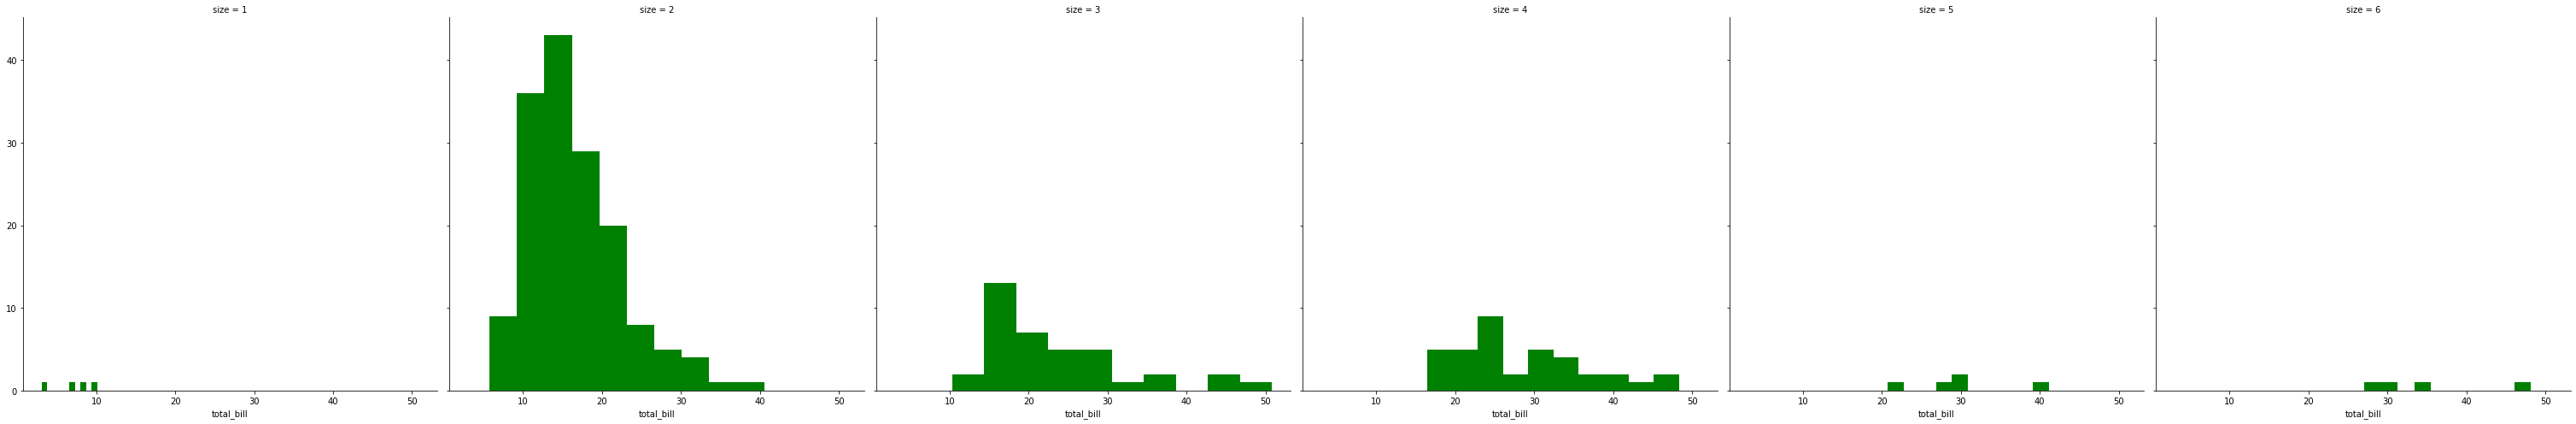

In [8]:
#I'm going to instantiate a FaceGrid here where the columns correspond to the
#size of the dining party
plt.figure(figsize = (15, 10))
fg = sns.FacetGrid(tips_data,
                  col = 'size',
                  height = 7, aspect = 1)
#I want to view a histogram of how the total bill varies based on different sizes
fg.map(plt.hist, 'total_bill', color = 'green')
plt.show()

In [9]:
#I'm going to sort my tips data based on the size of the dining party
#so our visualizations range from a party of size 1 up to a party of size 6
group_size_values = np.sort(tips_data['size'].unique())

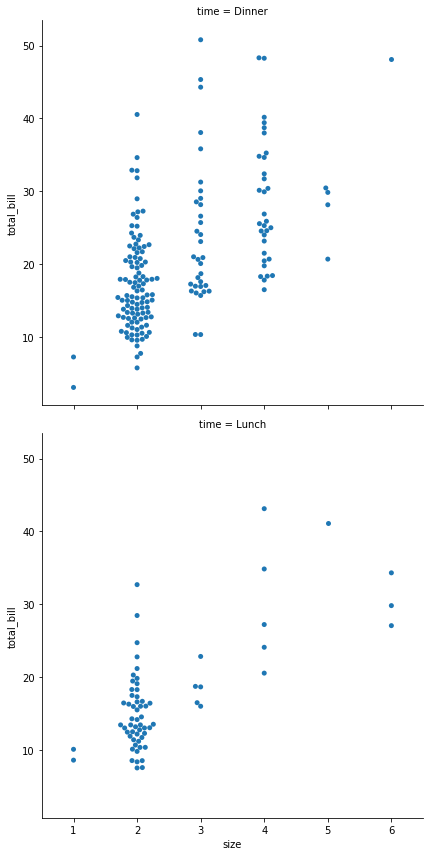

In [10]:
#instatiate a FacetGrid where the rows are based on the time at which the party
#dined, lunch or dinner
#when you use the row input argument, the plots are displayed row-wise
fg = sns.FacetGrid(tips_data,
                  row = 'time',
                  height = 6, aspect = 1)
#for either lunch or dinner, I want to see the total bill varies based on party
#size using a swarmplot
fg.map(sns.swarmplot,
      'size',
      'total_bill',
      order = group_size_values)
fg.add_legend()

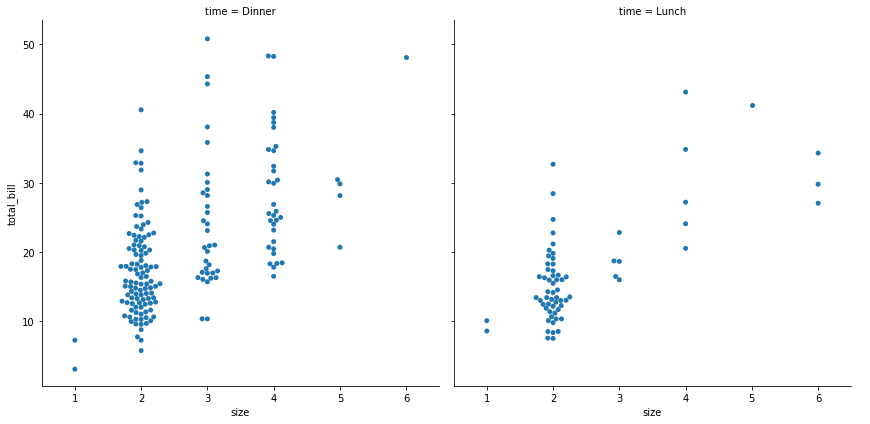

In [11]:
#same visualization to be laid out next to one another in different columns
#simply specify column is equal to Time
fg = sns.FacetGrid(tips_data,
                  col = 'time',
                  height = 6, aspect = 1)
fg.map(sns.swarmplot,
      'size',
      'total_bill',
      order = group_size_values)
fg.add_legend()